<a href="https://www.kaggle.com/code/surya11singh/rain-prediction-logistic-regression?scriptVersionId=224774117" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np

In [2]:
raw_df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [3]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
raw_df.shape

(145460, 23)

In [6]:
'''dropping rows where RainToday & RainTomorrow are null 
as they will not contribute to the predictive power of the algorithm'''

raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)
raw_df.shape

(140787, 23)

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [8]:
px.histogram(raw_df, x = 'Location', title = 'Location vs. Rainy Days', color = 'RainToday')

In [9]:
px.histogram(raw_df, x = 'RainTomorrow', title = 'Rain Tomorrow vs. Rain Today', color = 'RainToday')

**Class Imbalance can be observed from the above plot**

In [10]:
px.scatter(raw_df.sample(2000), x = 'MinTemp', y = 'MaxTemp', title = 'Min Temp. vs. Max Temp.', color = 'RainToday')

In [11]:
px.histogram(raw_df, x = 'Temp3pm', title = 'Temperature at 3 PM vs. Rain Tomorrow', color = 'RainTomorrow')

In [12]:
px.scatter(raw_df.sample(2000), x = 'Temp3pm', y = 'Humidity3pm', title = 'Temp. (3pm) vs. Humidity (3pm)', color = 'RainTomorrow')

In [13]:
#taking a 10% sample of data to work on
use_sample = True
sample_fraction = 0.1

if use_sample:
    raw_df = raw_df.sample(frac = sample_fraction).copy()

raw_df.shape

(14079, 23)

In [14]:
#performing a train, validation, test set split on the sample working data
from sklearn.model_selection import train_test_split

train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [15]:
print(f"train_df: {train_df.shape}")
print(f"val_df: {val_df.shape}")
print(f"test_df: {test_df.shape}")

train_df: (8447, 23)
val_df: (2816, 23)
test_df: (2816, 23)


<Axes: title={'center': '# of rows per year'}, xlabel='Date', ylabel='count'>

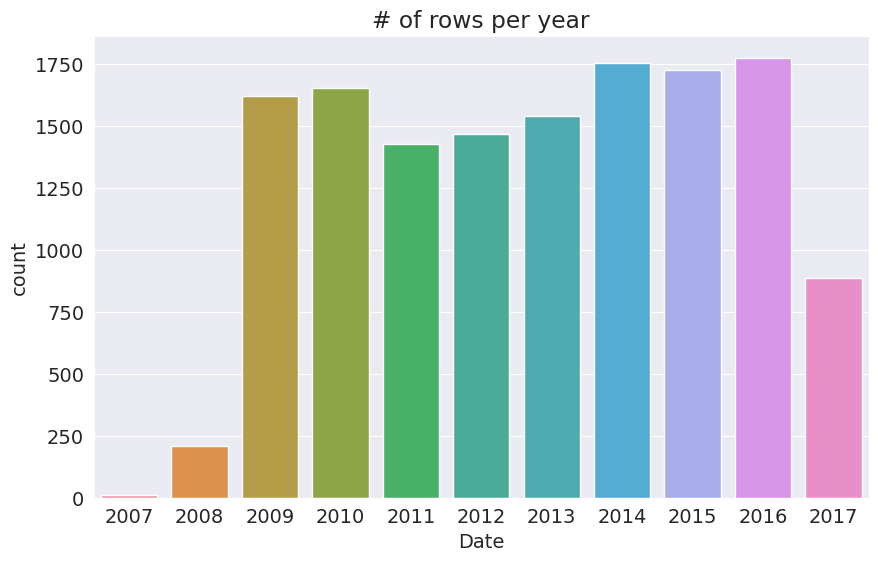

In [16]:
plt.title('# of rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year)

In [17]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

print(f"train_df: {train_df.shape}")
print(f"val_df: {val_df.shape}")
print(f"test_df: {test_df.shape}")

train_df: (9690, 23)
val_df: (1726, 23)
test_df: (2663, 23)


In [18]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
98343,2014-04-13,Adelaide,9.4,21.5,0.0,NaN,9.6,SSE,33.0,NNW,...,71.0,48.0,1021.8,1020.3,NaN,NaN,16.1,20.7,No,No
27629,2010-04-08,Richmond,17.8,28.4,0.0,1.8,NaN,SW,39.0,W,...,53.0,38.0,1013.2,1011.8,NaN,NaN,24.3,26.9,No,No
33905,2010-01-21,SydneyAirport,20.0,30.9,0.0,9.0,12.8,ENE,46.0,W,...,67.0,53.0,1012.3,1008.0,3.0,2.0,25.0,29.1,No,No
57178,2014-11-05,Ballarat,6.8,16.6,0.0,NaN,NaN,S,48.0,S,...,71.0,43.0,1018.8,1018.0,3.0,NaN,8.7,15.2,No,No
51057,2014-09-25,Tuggeranong,11.7,18.3,1.2,NaN,NaN,S,41.0,W,...,69.0,55.0,1012.4,1012.0,NaN,NaN,15.2,16.7,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61570,2010-01-24,Sale,7.7,24.3,0.0,6.6,12.0,SSE,46.0,SW,...,67.0,46.0,1015.7,1013.7,5.0,1.0,16.1,22.6,No,No
100942,2012-11-29,MountGambier,16.2,37.4,0.0,6.2,8.6,W,63.0,N,...,36.0,18.0,1004.5,1004.0,1.0,7.0,30.8,35.9,No,No
21744,2010-09-18,NorfolkIsland,15.5,19.8,0.2,5.2,9.1,SW,33.0,WSW,...,63.0,59.0,1019.7,1017.8,7.0,1.0,18.2,19.1,No,Yes
27825,2010-10-21,Richmond,9.2,25.2,0.2,NaN,NaN,ESE,33.0,NaN,...,77.0,44.0,1026.4,1021.1,NaN,NaN,15.7,24.1,No,No


In [19]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
123013,2015-03-31,Perth,17.3,25.3,0.0,2.6,7.5,SW,35.0,S,...,69.0,60.0,1018.0,1016.8,7.0,1.0,20.7,23.0,No,No
54495,2015-10-28,MountGinini,-2.0,14.9,0.0,NaN,NaN,ESE,28.0,NNW,...,18.0,45.0,NaN,NaN,NaN,NaN,10.5,14.1,No,No
11437,2015-10-05,CoffsHarbour,10.4,30.7,0.0,NaN,NaN,NE,24.0,WNW,...,45.0,27.0,1025.5,1023.4,NaN,NaN,25.1,29.6,No,No
114013,2015-10-28,Witchcliffe,15.1,25.5,0.0,NaN,NaN,SSE,31.0,SE,...,66.0,57.0,1017.0,1014.8,NaN,NaN,19.7,23.9,No,No
132171,2015-02-17,Hobart,13.8,18.6,0.0,6.6,2.0,S,22.0,ENE,...,82.0,81.0,1019.8,1018.8,7.0,7.0,15.5,16.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126092,2015-06-17,SalmonGums,0.8,15.1,0.0,NaN,NaN,E,39.0,ENE,...,96.0,58.0,NaN,NaN,NaN,NaN,8.1,13.8,No,Yes
113798,2015-03-27,Witchcliffe,11.8,26.5,0.0,NaN,NaN,W,33.0,N,...,55.0,59.0,1021.6,1019.3,NaN,NaN,22.0,23.9,No,No
35760,2015-05-19,SydneyAirport,14.7,22.5,0.0,0.4,1.8,N,28.0,NW,...,78.0,54.0,1020.6,1015.2,8.0,6.0,16.9,21.9,No,Yes
35739,2015-04-28,SydneyAirport,10.6,18.6,0.0,5.6,10.4,S,41.0,NW,...,54.0,53.0,1026.1,1024.6,1.0,1.0,16.2,18.0,No,No


In [20]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
66957,2016-10-26,MelbourneAirport,14.0,19.3,0.0,7.2,1.5,N,50.0,WSW,...,84.0,84.0,1009.7,1012.0,7.0,8.0,14.3,14.8,No,Yes
36403,2017-02-20,SydneyAirport,17.0,29.3,7.2,8.0,12.5,W,61.0,WNW,...,36.0,16.0,1010.9,1009.7,0.0,0.0,19.8,27.2,Yes,No
126596,2016-11-02,SalmonGums,2.6,29.7,0.0,NaN,NaN,NE,30.0,NE,...,51.0,15.0,NaN,NaN,NaN,NaN,18.4,28.9,No,No
64154,2017-05-20,Sale,9.5,21.1,0.4,NaN,NaN,NaN,NaN,W,...,100.0,67.0,1017.1,1015.7,8.0,NaN,12.4,19.1,No,No
14645,2016-04-21,Moree,14.6,30.2,0.0,5.4,NaN,ENE,26.0,NE,...,55.0,29.0,1022.5,1018.2,2.0,3.0,22.3,28.9,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57702,2016-04-12,Ballarat,10.3,16.9,0.4,NaN,NaN,SSE,33.0,SSW,...,98.0,56.0,1026.0,1023.7,8.0,1.0,11.6,15.8,No,No
2675,2016-06-26,Albury,-1.3,7.5,0.0,NaN,NaN,ENE,15.0,NaN,...,99.0,79.0,1023.4,1019.0,8.0,NaN,2.3,7.4,No,No
89851,2016-06-02,Cairns,20.0,27.0,0.4,5.8,NaN,SSE,39.0,SSE,...,80.0,79.0,1016.5,1013.7,4.0,8.0,24.2,24.8,No,No
138864,2016-10-22,AliceSprings,11.8,21.6,3.1,NaN,NaN,E,44.0,ESE,...,50.0,25.0,1022.6,1019.5,8.0,1.0,14.3,19.7,Yes,No


In [21]:
#identifying input and target columns
input_cols = list(train_df.columns[1:-1])
target_col = 'RainTomorrow'
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [22]:
#creating input for training, validation and testing
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [23]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
98343,Adelaide,9.4,21.5,0.0,NaN,9.6,SSE,33.0,NNW,S,...,17.0,71.0,48.0,1021.8,1020.3,NaN,NaN,16.1,20.7,No
27629,Richmond,17.8,28.4,0.0,1.8,NaN,SW,39.0,W,SSW,...,22.0,53.0,38.0,1013.2,1011.8,NaN,NaN,24.3,26.9,No
33905,SydneyAirport,20.0,30.9,0.0,9.0,12.8,ENE,46.0,W,ENE,...,31.0,67.0,53.0,1012.3,1008.0,3.0,2.0,25.0,29.1,No
57178,Ballarat,6.8,16.6,0.0,NaN,NaN,S,48.0,S,SSW,...,24.0,71.0,43.0,1018.8,1018.0,3.0,NaN,8.7,15.2,No
51057,Tuggeranong,11.7,18.3,1.2,NaN,NaN,S,41.0,W,SSE,...,22.0,69.0,55.0,1012.4,1012.0,NaN,NaN,15.2,16.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61570,Sale,7.7,24.3,0.0,6.6,12.0,SSE,46.0,SW,SSE,...,20.0,67.0,46.0,1015.7,1013.7,5.0,1.0,16.1,22.6,No
100942,MountGambier,16.2,37.4,0.0,6.2,8.6,W,63.0,N,NNW,...,26.0,36.0,18.0,1004.5,1004.0,1.0,7.0,30.8,35.9,No
21744,NorfolkIsland,15.5,19.8,0.2,5.2,9.1,SW,33.0,WSW,W,...,19.0,63.0,59.0,1019.7,1017.8,7.0,1.0,18.2,19.1,No
27825,Richmond,9.2,25.2,0.2,NaN,NaN,ESE,33.0,NaN,ENE,...,7.0,77.0,44.0,1026.4,1021.1,NaN,NaN,15.7,24.1,No


In [24]:
train_targets

98343      No
27629      No
33905      No
57178      No
51057     Yes
         ... 
61570      No
100942     No
21744     Yes
27825      No
137017     No
Name: RainTomorrow, Length: 9690, dtype: object

In [25]:
#identifying numerical and categorical variables
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [26]:
#let's look at the stats of the numeric columns
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,9648.000000,9665.000000,9690.000000,6146.000000,5774.000000,8988.000000,9608.000000,9591.000000,9580.000000,9580.000000,8799.000000,8798.000000,6243.000000,6142.000000,9625.000000,9631.000000
mean,11.949430,22.983683,2.253870,5.250862,7.619311,40.113373,14.001769,18.724638,68.740605,51.355115,1017.569428,1015.178563,4.353676,4.409639,16.780769,21.518170
std,6.322277,7.002278,7.650616,4.117345,3.809207,13.693889,9.020667,8.896191,19.090732,20.700137,7.087645,7.044676,2.851361,2.699139,6.424448,6.832464
min,-6.200000,-2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,987.000000,984.200000,0.000000,0.000000,-4.300000,-2.700000
25%,7.400000,17.800000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,36.000000,1012.800000,1010.500000,1.000000,2.000000,12.100000,16.500000
50%,11.700000,22.300000,0.000000,4.400000,8.450000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.500000,20.800000
75%,16.400000,27.900000,0.800000,7.000000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.300000,26.200000
max,29.400000,46.700000,183.400000,68.800000,13.800000,120.000000,74.000000,65.000000,100.000000,100.000000,1039.500000,1038.000000,8.000000,8.000000,39.100000,45.200000


In [27]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [28]:
#imputing missing numerical data
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'mean')

raw_df[numeric_cols].isna().sum()

MinTemp            56
MaxTemp            31
Rainfall            0
Evaporation      5970
Sunshine         6658
WindGustSpeed     933
WindSpeed9am      103
WindSpeed3pm      239
Humidity9am       159
Humidity3pm       339
Pressure9am      1381
Pressure3pm      1381
Cloud9am         5267
Cloud3pm         5589
Temp9am            75
Temp3pm           250
dtype: int64

In [29]:
train_inputs[numeric_cols].isna().sum()

MinTemp            42
MaxTemp            25
Rainfall            0
Evaporation      3544
Sunshine         3916
WindGustSpeed     702
WindSpeed9am       82
WindSpeed3pm       99
Humidity9am       110
Humidity3pm       110
Pressure9am       891
Pressure3pm       892
Cloud9am         3447
Cloud3pm         3548
Temp9am            65
Temp3pm            59
dtype: int64

In [30]:
imputer.fit(raw_df[numeric_cols])
list(imputer.statistics_) #computed stats of all the numerical columns is now in the property of imputer

[12.12709120730229,
 23.17870159453303,
 2.3277079338021167,
 5.430164015291651,
 7.638727934240668,
 39.848014605203105,
 13.896036061820263,
 18.553757225433525,
 69.03541666666666,
 51.49243085880641,
 1017.69825169318,
 1015.3116947550795,
 4.487630503858375,
 4.4972909305064785,
 16.917687803484718,
 21.641441897461856]

In [31]:
#now imputing the missing values in train, validation, and test set with the computed stats from imputer
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [32]:
train_inputs[numeric_cols].isna().sum() #all missing values are imputed with computed stats

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [33]:
#Scaling numerical features to prevent disproportionate impact on model from the numeric calumns with significantly variaying values
raw_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,14023.000000,14048.000000,14079.000000,8109.000000,7421.000000,13146.000000,13976.000000,13840.000000,13920.000000,13740.000000,12698.000000,12698.000000,8812.000000,8490.000000,14004.000000,13829.000000
mean,12.127091,23.178702,2.327708,5.430164,7.638728,39.848015,13.896036,18.553757,69.035417,51.492431,1017.698252,1015.311695,4.487631,4.497291,16.917688,21.641442
std,6.431504,7.157871,8.193129,4.513693,3.794957,13.572835,8.907041,8.795876,19.153029,20.778386,7.146329,7.094469,2.866564,2.727254,6.544717,6.962825
min,-7.800000,-2.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,986.200000,984.200000,0.000000,0.000000,-7.000000,-3.500000
25%,7.500000,17.800000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.500000,1.000000,2.000000,12.175000,16.500000
50%,11.900000,22.500000,0.000000,4.600000,8.400000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.600000,1015.300000,5.000000,5.000000,16.600000,21.000000
75%,16.800000,28.200000,0.800000,7.200000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.600000,1020.100000,7.000000,7.000000,21.600000,26.400000
max,31.900000,46.700000,225.000000,145.000000,14.000000,120.000000,74.000000,65.000000,100.000000,100.000000,1039.500000,1038.000000,8.000000,8.000000,39.100000,45.200000


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

print('Minimum:')
print(scaler.data_min_)
print('\n')
print('Maximum:')
print(scaler.data_max_)

Minimum:
[ -7.8  -2.    0.    0.    0.    7.    0.    0.    1.    1.  986.2 984.2
   0.    0.   -7.   -3.5]


Maximum:
[  31.9   46.7  225.   145.    14.   120.    74.    65.   100.   100.
 1039.5 1038.     8.     8.    39.1   45.2]


In [35]:
#scaling the split datasets
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [36]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000
mean,0.497486,0.513022,0.010017,0.036665,0.544797,0.292869,0.189201,0.288044,0.684282,0.508653,0.588767,0.576038,0.550166,0.555217,0.515872,0.513736
std,0.158906,0.143598,0.034003,0.022621,0.210025,0.116714,0.121384,0.136164,0.191738,0.207902,0.126717,0.124771,0.286190,0.268658,0.138891,0.139869
min,0.040302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015009,0.000000,0.000000,0.000000,0.058568,0.016427
25%,0.385390,0.406571,0.000000,0.024828,0.528571,0.212389,0.094595,0.200000,0.565657,0.363636,0.510319,0.498141,0.375000,0.375000,0.414317,0.410678
50%,0.493703,0.498973,0.000000,0.037449,0.545623,0.283186,0.175676,0.292308,0.696970,0.515152,0.590962,0.578284,0.560954,0.562161,0.509761,0.501027
75%,0.609572,0.613963,0.003556,0.038621,0.664286,0.345133,0.256757,0.369231,0.828283,0.646465,0.667917,0.654275,0.750000,0.750000,0.611714,0.607803
max,0.937028,1.000000,0.815111,0.474483,0.985714,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
